In [ ]:
import os

/home/zuzanna/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from model import PCA_Model
from dataloader import DataLoader


['/home/zuzanna/miniconda3/lib/python312.zip', '/home/zuzanna/miniconda3/lib/python3.12', '/home/zuzanna/miniconda3/lib/python3.12/lib-dynload', '', '/home/zuzanna/miniconda3/lib/python3.12/site-packages', '/home']


/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.expe

In [3]:
# Load the data using DataLoader
file_path = "100_tea_preprocessed.h5mu.gz"  
data_loader = DataLoader(file_path=file_path)
dataset = data_loader.read_mudata()  

/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [4]:
dataset

MuData object with n_obs × n_vars = 7084 × 17546
  var:	'highly_variable'
  3 modalities
    rna:	7084 x 2500
      obs:	'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'log1p'
      layers:	'counts'
    atac:	7084 x 15000
      obs:	'n_genes_by_counts', 'total_counts', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'Chromosome', 'Range', 'Start', 'End', 'Length', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'log1p'
      layers:	'counts'
    adt:	7084 x 46
      obs:	'celltype'
      var:	'highly_variable'
      layers:	'counts'

In [5]:
# Initialize PCA_Model
data_dir = "./test_output" 
os.makedirs(data_dir, exist_ok=True)
pca_model = PCA_Model(data_dir=data_dir, dataset=dataset, n_components=10, name="100_tea")


Initializing PCA Model


In [6]:
# Perform PCA
pca_model.train()


Training PCA Model
PCA completed with 10 components


In [7]:
# Inspect PCA results
for modality in dataset.mod.keys():
    print(f"\n{modality.upper()} PCA Embeddings:")
    print(dataset[modality].obsm['X_pca'])



RNA PCA Embeddings:
[[-6.748962   -1.8489326   0.9103451  ... -0.37562183  0.13908955
  -0.7690752 ]
 [17.585705   -6.4863834   2.4146984  ...  0.76725113 -0.84967786
   2.0364437 ]
 [-5.1978846  -4.2318983  -4.778584   ...  0.91551477 -1.9765593
   0.33510584]
 ...
 [-6.7907796   2.002216    8.280296   ...  4.8740172  -4.088646
   4.2068133 ]
 [-3.4033153  -3.5727246  -2.3219936  ...  0.39357808  2.7201085
  -1.6450437 ]
 [-4.758152   -5.136544   -5.1400037  ...  2.7358582   0.97207695
   0.046608  ]]

ATAC PCA Embeddings:
[[-6.748962   -1.8489326   0.9103451  ... -0.37562183  0.13908955
  -0.7690752 ]
 [17.585705   -6.4863834   2.4146984  ...  0.76725113 -0.84967786
   2.0364437 ]
 [-5.1978846  -4.2318983  -4.778584   ...  0.91551477 -1.9765593
   0.33510584]
 ...
 [-6.7907796   2.002216    8.280296   ...  4.8740172  -4.088646
   4.2068133 ]
 [-3.4033153  -3.5727246  -2.3219936  ...  0.39357808  2.7201085
  -1.6450437 ]
 [-4.758152   -5.136544   -5.1400037  ...  2.7358582   0.972076

In [8]:
# Save PCA latent embeddings
pca_model.save_latent()


Saving PCA latent embeddings


/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zuzanna/miniconda3/lib/python3.12/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


Latent data saved to ./test_output/pca_100_tea.h5ad


Generating UMAP with PCA embeddings for all modalities
Processing modality: rna


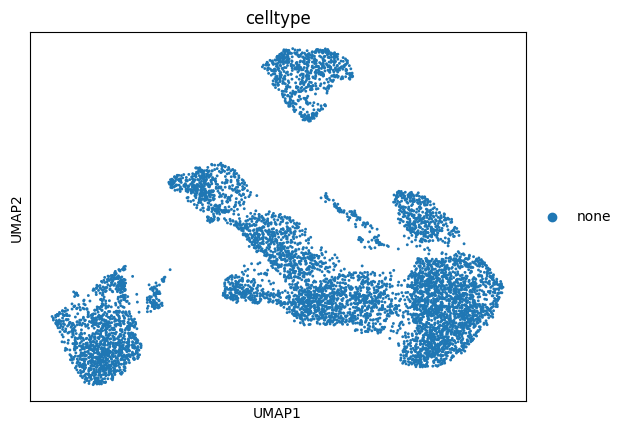

UMAP plot for rna saved as 100_tea_pca_umap.png
Processing modality: atac


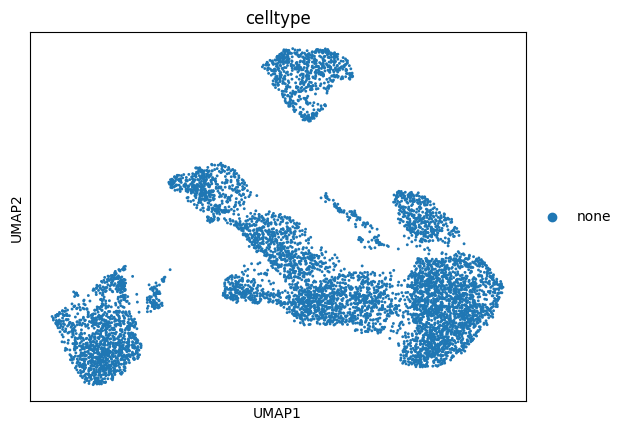

UMAP plot for atac saved as 100_tea_pca_umap.png
Processing modality: adt


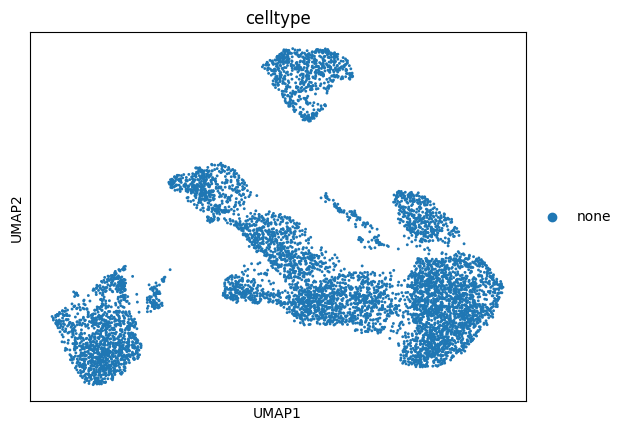

UMAP plot for adt saved as 100_tea_pca_umap.png


In [9]:
# Generate UMAP visualization (optional)

pca_model.umap(random_state=42, filename="100_tea_pca_umap.png", color_type='celltype')